# Imports.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split

# Load Data.

In [4]:
path = 'my_dataset/X_and_y/'
# allow_pickle=True could lead to securtiy issues later on
X = np.load(path+'data_general_train.npy', allow_pickle=True)
y = np.load(path+'labels_general_train.npy', allow_pickle=True)

In [5]:
# Needs to Reshape Our y to a 1-D vector
samples, cols, rows = y.shape
y = np.reshape(y, (samples, cols* rows) )

In [6]:
X.shape, y.shape

((80, 2500, 10), (80, 25000))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [8]:
X_train[0].shape

(2500, 10)

# Build Models.

In [9]:
#X_train_RNN, X_test_RNN = X_train.copy() , X_test.copy()

In [10]:
#X_train_RNN.shape, X_test_RNN.shape

In [11]:
#X_train_RNN = np.reshape(X_train_RNN, ( X_train_RNN.shape[0], X_train_RNN.shape[1], 10 ))
#X_train_RNN.shape

## RNN

In [12]:
def RNN_model():   
    inputs = layers.Input(shape=(2_500,10))
    
    x1 = layers.SimpleRNN(64, return_sequences=True)(inputs)
    x1 = layers.Dropout(.4)(x1)
    x2 = layers.SimpleRNN(64)(x1)
    
    outputs = layers.Dense(units=25_000, activation='linear')(x2)
    
    model = Model(inputs, outputs)
    rmse = tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None)
    model.compile(optimizer="adam", loss='mean_squared_error' , metrics=[rmse])
    model.summary()
    return  model

In [13]:
RNN_model_1 = RNN_model()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2500, 10)]        0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 2500, 64)          4800      
                                                                 
 dropout (Dropout)           (None, 2500, 64)          0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 25000)             1625000   
                                                                 
Total params: 1,638,056
Trainable params: 1,638,056
Non-trainable params: 0
_________________________________________________________________


In [14]:
%%time
history_RNN_model_1 = RNN_model_1.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=20) 

Epoch 1/20
2/2 [==============================] - 6s 2s/step - loss: 0.1562 - root_mean_squared_error: 0.3952 - val_loss: 0.1460 - val_root_mean_squared_error: 0.3822
Epoch 2/20
2/2 [==============================] - 3s 1s/step - loss: 0.1471 - root_mean_squared_error: 0.3836 - val_loss: 0.1337 - val_root_mean_squared_error: 0.3657
Epoch 3/20
2/2 [==============================] - 2s 1s/step - loss: 0.1338 - root_mean_squared_error: 0.3658 - val_loss: 0.1210 - val_root_mean_squared_error: 0.3478
Epoch 4/20
2/2 [==============================] - 3s 1s/step - loss: 0.1195 - root_mean_squared_error: 0.3456 - val_loss: 0.1130 - val_root_mean_squared_error: 0.3361
Epoch 5/20
2/2 [==============================] - 2s 1s/step - loss: 0.1097 - root_mean_squared_error: 0.3312 - val_loss: 0.1124 - val_root_mean_squared_error: 0.3353
Epoch 6/20
2/2 [==============================] - 2s 1s/step - loss: 0.1050 - root_mean_squared_error: 0.3240 - val_loss: 0.1160 - val_root_mean_squared_error: 0.340

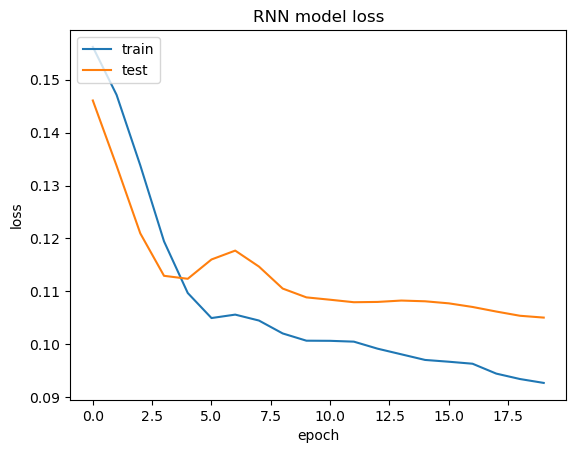

In [15]:
# summarize history for loss
plt.plot(history_RNN_model_1.history['loss'])
plt.plot(history_RNN_model_1.history['val_loss'])
plt.title('RNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## LSTM.

In [16]:
def LSTM_model():   
    inputs = layers.Input(shape=(2_500,10))
    
    x1 = layers.LSTM(128, return_sequences=True)(inputs)
    x1 = layers.Dropout(.4)(x1)
    x2 = layers.LSTM(128)(x1)
    x2 = layers.Dropout(.2)(x2)
    
    outputs = layers.Dense(units=25_000, activation='linear')(x2)
    
    model = Model(inputs, outputs)
    rmse = tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None)
    model.compile(optimizer="adam", loss='mean_squared_error' , metrics=[rmse])
    model.summary()
    return  model

In [17]:
LSTM_model_1 = LSTM_model()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2500, 10)]        0         
                                                                 
 lstm (LSTM)                 (None, 2500, 128)         71168     
                                                                 
 dropout_1 (Dropout)         (None, 2500, 128)         0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 25000)             3225000   
                                                                 
Total params: 3,427,752
Trainable params: 3,427,752
Non-tra

In [18]:
%%time
history_LSTM_model_1 = LSTM_model_1.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=20) 

Epoch 1/20
2/2 [==============================] - 17s 6s/step - loss: 0.1558 - root_mean_squared_error: 0.3947 - val_loss: 0.1518 - val_root_mean_squared_error: 0.3897
Epoch 2/20
2/2 [==============================] - 12s 6s/step - loss: 0.1542 - root_mean_squared_error: 0.3926 - val_loss: 0.1488 - val_root_mean_squared_error: 0.3857
Epoch 3/20
2/2 [==============================] - 12s 6s/step - loss: 0.1499 - root_mean_squared_error: 0.3871 - val_loss: 0.1401 - val_root_mean_squared_error: 0.3743
Epoch 4/20
2/2 [==============================] - 13s 7s/step - loss: 0.1376 - root_mean_squared_error: 0.3710 - val_loss: 0.1213 - val_root_mean_squared_error: 0.3483
Epoch 5/20
2/2 [==============================] - 12s 6s/step - loss: 0.1170 - root_mean_squared_error: 0.3420 - val_loss: 0.1122 - val_root_mean_squared_error: 0.3350
Epoch 6/20
2/2 [==============================] - 12s 6s/step - loss: 0.1096 - root_mean_squared_error: 0.3311 - val_loss: 0.1183 - val_root_mean_squared_error:

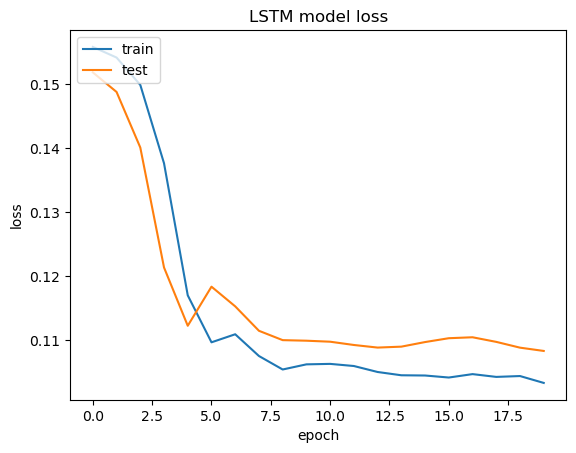

In [19]:
# summarize history for loss
plt.plot(history_LSTM_model_1.history['loss'])
plt.plot(history_LSTM_model_1.history['val_loss'])
plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## GRU.

In [20]:
def GRU_model():   
    inputs = layers.Input(shape=(2_500,10))
    
    x1 = layers.GRU(64, return_sequences=True)(inputs)
    x1 = layers.Dropout(0.4)(x1)
    x2 = layers.GRU(64)(x1)
    x2 = layers.Dropout(0.1)(x2)
    outputs = layers.Dense(units=25_000, activation='linear')(x2)
    
    model = Model(inputs, outputs)
    rmse = tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None)
    model.compile(optimizer="adam", loss='mean_squared_error' , metrics=[rmse])
    model.summary()
    return  model

In [21]:
GRU_model_1 = GRU_model()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2500, 10)]        0         
                                                                 
 gru (GRU)                   (None, 2500, 64)          14592     
                                                                 
 dropout_3 (Dropout)         (None, 2500, 64)          0         
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 25000)             1625000   
                                                                 
Total params: 1,664,552
Trainable params: 1,664,552
Non-tra

In [22]:
%%time
history_GRU_model_1 = GRU_model_1.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=20) 

Epoch 1/20
2/2 [==============================] - 10s 3s/step - loss: 0.1558 - root_mean_squared_error: 0.3947 - val_loss: 0.1516 - val_root_mean_squared_error: 0.3894
Epoch 2/20
2/2 [==============================] - 6s 3s/step - loss: 0.1539 - root_mean_squared_error: 0.3923 - val_loss: 0.1492 - val_root_mean_squared_error: 0.3863
Epoch 3/20
2/2 [==============================] - 6s 3s/step - loss: 0.1510 - root_mean_squared_error: 0.3886 - val_loss: 0.1455 - val_root_mean_squared_error: 0.3814
Epoch 4/20
2/2 [==============================] - 5s 3s/step - loss: 0.1464 - root_mean_squared_error: 0.3827 - val_loss: 0.1399 - val_root_mean_squared_error: 0.3740
Epoch 5/20
2/2 [==============================] - 5s 3s/step - loss: 0.1396 - root_mean_squared_error: 0.3737 - val_loss: 0.1320 - val_root_mean_squared_error: 0.3633
Epoch 6/20
2/2 [==============================] - 6s 3s/step - loss: 0.1305 - root_mean_squared_error: 0.3613 - val_loss: 0.1219 - val_root_mean_squared_error: 0.34

In [23]:
X_train.shape, y_train.shape

((56, 2500, 10), (56, 25000))

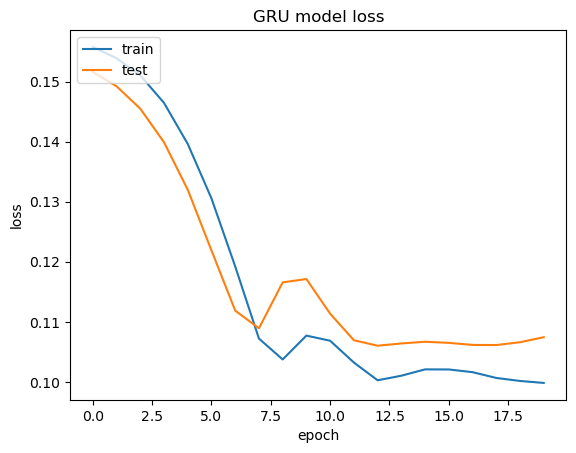

In [24]:
# summarize history for loss
plt.plot(history_GRU_model_1.history['loss'])
plt.plot(history_GRU_model_1.history['val_loss'])
plt.title('GRU model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()